In [60]:
import sys
import os

# Adds the root of your project to the system path
sys.path.append(os.path.abspath(".."))

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scrapers.utils import get_db_engine

In [61]:
engine = get_db_engine()

In [62]:
query = "SELECT home_team, away_team, home_goals, away_goals, season from public_analysis.matches;"
df = pd.read_sql(query, engine)

In [63]:
engine.dispose()

In [64]:
season_2020 = df[df['season']=='2020']
season_2021 = df[df['season']=='2021']

In [65]:
season_2020

,home_team,away_team,home_goals,away_goals,season
0,Fulham,Arsenal,0,3,2020
1,Crystal Palace,Southampton,1,0,2020
2,Liverpool,Leeds,4,3,2020
3,West Ham,Newcastle United,0,2,2020
4,West Bromwich Albion,Leicester,0,3,2020
...,...,...,...,...,...
375,Liverpool,Crystal Palace,2,0,2020
376,Manchester City,Everton,5,0,2020
377,Sheffield United,Burnley,1,0,2020
378,West Ham,Southampton,3,0,2020


In [66]:
season_2021

,home_team,away_team,home_goals,away_goals,season
380,Brentford,Arsenal,2,0,2021
381,Manchester United,Leeds,5,1,2021
382,Burnley,Brighton,1,2,2021
383,Chelsea,Crystal Palace,3,0,2021
384,Everton,Southampton,3,1,2021
...,...,...,...,...,...
755,Crystal Palace,Manchester United,1,0,2021
756,Leicester,Southampton,4,1,2021
757,Liverpool,Wolverhampton Wanderers,3,1,2021
758,Manchester City,Aston Villa,3,2,2021


T-statistic: 0.1658, P-value (two-tailed): 0.4350
Mean home advantage (goals per match): 0.011


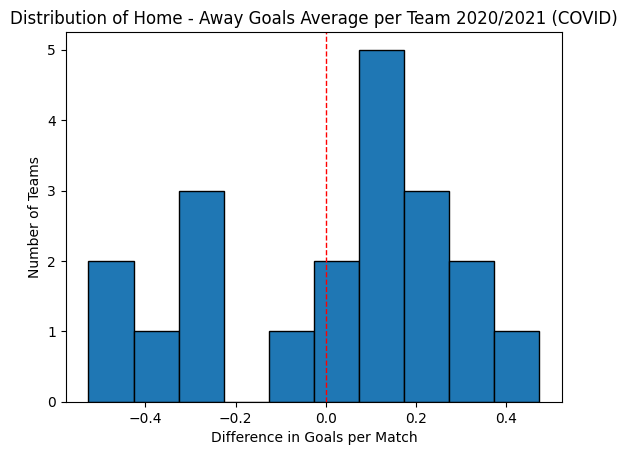

In [67]:
# Compute goals scored at home and away per team
home_stats = season_2020.groupby('home_team')['home_goals'].agg(['count', 'mean']).rename(columns={'count': 'home_games', 'mean': 'home_goals_avg'})
away_stats = season_2020.groupby('away_team')['away_goals'].agg(['count', 'mean']).rename(columns={'count': 'away_games', 'mean': 'away_goals_avg'})

# Merge home and away stats into one DataFrame
team_stats = home_stats.merge(away_stats, left_index=True, right_index=True)

# Extract paired samples
home_avg = team_stats['home_goals_avg'].values
away_avg = team_stats['away_goals_avg'].values

# Run paired t-test
t_stat, p_value = stats.ttest_rel(home_avg, away_avg)
p_value_one_tailed = p_value / 2

print(f"T-statistic: {t_stat:.4f}, P-value (two-tailed): {p_value_one_tailed:.4f}")

# Mean difference
mean_diff = np.mean(home_avg - away_avg)
print(f"Mean home advantage (goals per match): {mean_diff:.3f}")

# Optional: Visualize
plt.hist(home_avg - away_avg, bins=10, edgecolor='black')
plt.title('Distribution of Home - Away Goals Average per Team 2020/2021 (COVID)')
plt.xlabel('Difference in Goals per Match')
plt.ylabel('Number of Teams')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.show()

T-statistic: 3.2804, P-value (two-tailed): 0.0020
Mean home advantage (goals per match): 0.208


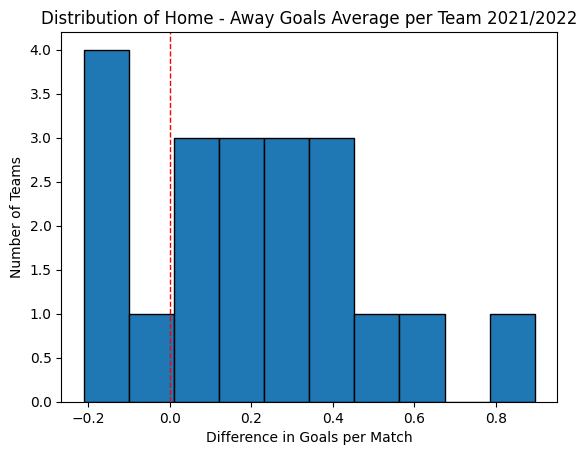

In [68]:
# Compute goals scored at home and away per team
home_stats = season_2021.groupby('home_team')['home_goals'].agg(['count', 'mean']).rename(columns={'count': 'home_games', 'mean': 'home_goals_avg'})
away_stats = season_2021.groupby('away_team')['away_goals'].agg(['count', 'mean']).rename(columns={'count': 'away_games', 'mean': 'away_goals_avg'})

# Merge home and away stats into one DataFrame
team_stats = home_stats.merge(away_stats, left_index=True, right_index=True)

# Extract paired samples
home_avg = team_stats['home_goals_avg'].values
away_avg = team_stats['away_goals_avg'].values

# Run paired t-test
t_stat, p_value = stats.ttest_rel(home_avg, away_avg)
p_value_one_tailed = p_value / 2

print(f"T-statistic: {t_stat:.4f}, P-value (two-tailed): {p_value_one_tailed:.4f}")

# Mean difference
mean_diff = np.mean(home_avg - away_avg)
print(f"Mean home advantage (goals per match): {mean_diff:.3f}")

# Optional: Visualize
plt.hist(home_avg - away_avg, bins=10, edgecolor='black')
plt.title('Distribution of Home - Away Goals Average per Team 2021/2022')
plt.xlabel('Difference in Goals per Match')
plt.ylabel('Number of Teams')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.show()

T-statistic: 3.1142, P-value (two-tailed): 0.0022
Mean home advantage (goals per match): 0.147


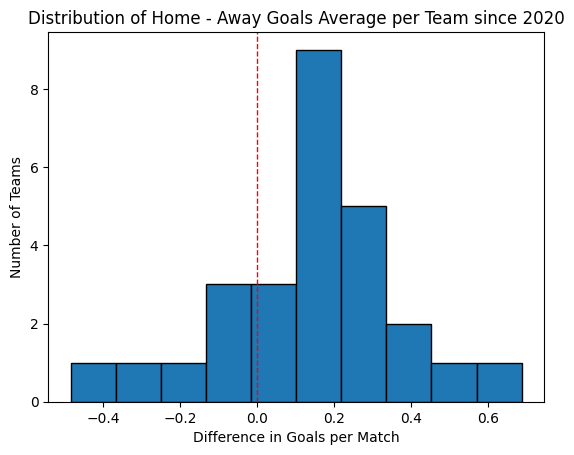

In [69]:
# Compute goals scored at home and away per team
home_stats = df.groupby('home_team')['home_goals'].agg(['count', 'mean']).rename(columns={'count': 'home_games', 'mean': 'home_goals_avg'})
away_stats = df.groupby('away_team')['away_goals'].agg(['count', 'mean']).rename(columns={'count': 'away_games', 'mean': 'away_goals_avg'})

# Merge home and away stats into one DataFrame
team_stats = home_stats.merge(away_stats, left_index=True, right_index=True)

# Extract paired samples
home_avg = team_stats['home_goals_avg'].values
away_avg = team_stats['away_goals_avg'].values

# Run paired t-test
t_stat, p_value = stats.ttest_rel(home_avg, away_avg)
p_value_one_tailed = p_value / 2

print(f"T-statistic: {t_stat:.4f}, P-value (two-tailed): {p_value_one_tailed:.4f}")

# Mean difference
mean_diff = np.mean(home_avg - away_avg)
print(f"Mean home advantage (goals per match): {mean_diff:.3f}")

# Optional: Visualize
plt.hist(home_avg - away_avg, bins=10, edgecolor='black')
plt.title('Distribution of Home - Away Goals Average per Team since 2020')
plt.xlabel('Difference in Goals per Match')
plt.ylabel('Number of Teams')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.show()